# Backtesting with TWP backtesting module #

Strategy simulation often includes going through same steps : determining entry and exit moments, calculating number of shares capital and pnl. To limit the number of lines of code needed to perform a backtest, the *twp* library includes a simple backtesting module.

The *backtest* module is a very simple version of a vectorized backtester. It can be used as a stand-alone module without the rest of the *tradingWithPython* library.

All of the functionality is accessible through the *Backtest* class, which will be demonstrated here.


The backtester needs an instrument price and entry/exit signals to do its job. Let's start by creating simple data series to test it.

In [1]:
%pylab inline
%run common.py

import pandas as pd
import tradingWithPython as twp


# create example signals for demonstrating backterster functionality

price = pd.Series(arange(10)) # price, just a linear incrementing series
signal = pd.Series(index=price.index) # strategy signal, in $

signal[2] = 100 # go long 100$ 
signal[3] = 0  # exit

signal[6] = -100 # go short 100$
signal[8] = 0 # exit


pd.DataFrame({'price':price,'signal':signal}) # show price and signal as a table.

Populating the interactive namespace from numpy and matplotlib


,price,signal
0,0,NaN
1,1,NaN
2,2,100.0
3,3,0.0
4,4,NaN
5,5,NaN
6,6,-100.0
7,7,NaN
8,8,0.0
9,9,NaN


The `Backtest` class is created with these arguments:

        
- *price*  Series with instrument price.
- *signal* Series with capital to invest (long+,short-) or number of shares. 
- *sitnalType* capital to bet or number of shares 'capital' mode is default.
- *initialCash* starting cash. 0 is default

The *signal* can be either capital to trade or number of shares to buy/sell. 'capital' is the default mode, to use number of shares, use `signalType='shares'` 

All calculations are perfromed at class creation.

Results of the calculations can be acessed as follows:

- *Backtest.data*  full data table, excel-like. pnl column is cumulative
- *Backtest.pnl* easy access to pnl column of the data table
- *Backtest.sharpe* Sharpe of the pnl

('Sharpe: ', 2.1799902786275269)


,price,shares,value,cash,pnl,delta
0,0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0
2,2,50.0,100.0,-100.0,0.0,50.0
3,3,0.0,0.0,50.0,50.0,-50.0
4,4,0.0,0.0,50.0,50.0,0.0
5,5,0.0,0.0,50.0,50.0,0.0
6,6,-17.0,-102.0,152.0,50.0,-17.0
7,7,-17.0,-119.0,152.0,33.0,0.0
8,8,0.0,0.0,16.0,16.0,17.0
9,9,0.0,0.0,16.0,16.0,0.0


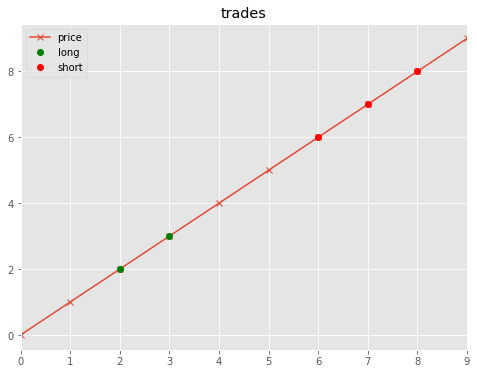

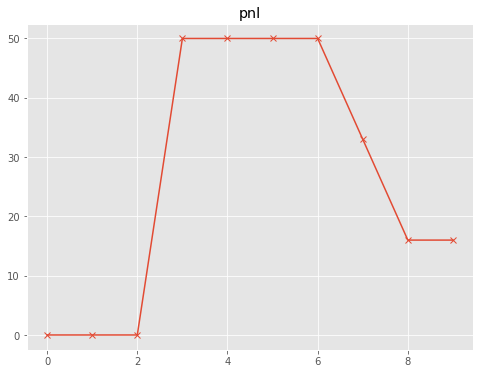

In [2]:
# use price and signal to perform a backtest
       
bt = twp.backtest.Backtest(price,signal) # create class, simulate
bt.plotTrades() # plot price and trades (short=red markers, long=green markers)

figure()
bt.pnl.plot(style='x-') # plot pnl
title('pnl')
print(('Sharpe: ', bt.sharpe))

# normally, daily change in shares (delta) is not included in the Backtest.data .
# Sometimes it is handy to have it, for adding transaction cost for example. 
# You can easily add it :
bt.data['delta'] = bt.data['shares'].diff().fillna(0)

bt.data # output strategy data



## Test on real price data##
Now let's use the backtester on some real price

Got 4578 days of data


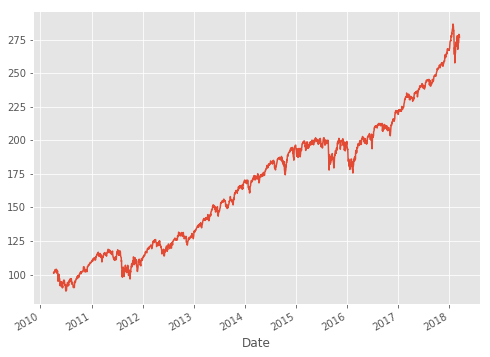

In [3]:
# start with getting some data to test on

import tradingWithPython.lib.yahooFinance as yahoo # yahoo finance module

price = yahoo.getHistoricData('SPY')['adj_close'][-2000:]

price.plot()

normally a buy/sell signal would be generated by a strategy. For simplicity I'll just simulate holding a position between two dates

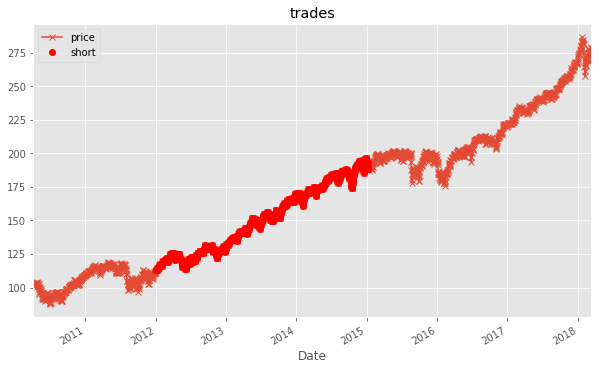

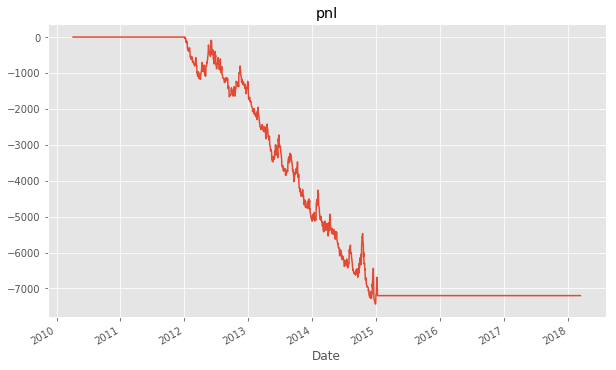

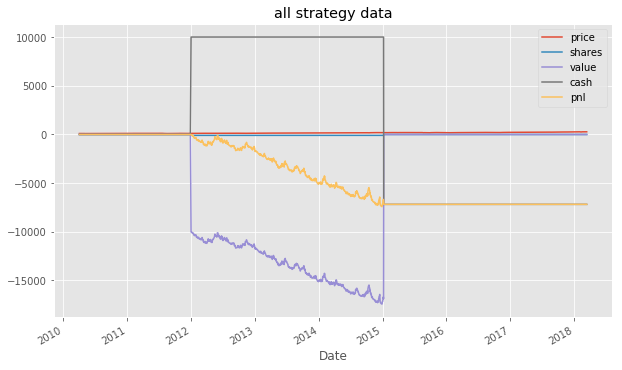

In [5]:
figsize(10,6)

# sumulate two trades
signal = pd.Series(index=price.index) #init signal series

# while setting values this way, make sure that the dates are actually in the index
signal[pd.datetime(2012,1,3)] = -10000 # go short 
signal[pd.datetime(2014,1,5)] = 10000 # go long 10k$ on this day
signal[pd.datetime(2015,1,8)] = 0 # close position


bt = twp.backtest.Backtest(price,signal,initialCash=0)
bt.plotTrades()

figure()
bt.pnl.plot()
title('pnl')

figure()
bt.data.plot()
title('all strategy data')